In [10]:
import math
import numpy as np
from scipy.integrate import quad
import matplotlib.pyplot as plt
import sympy as sp

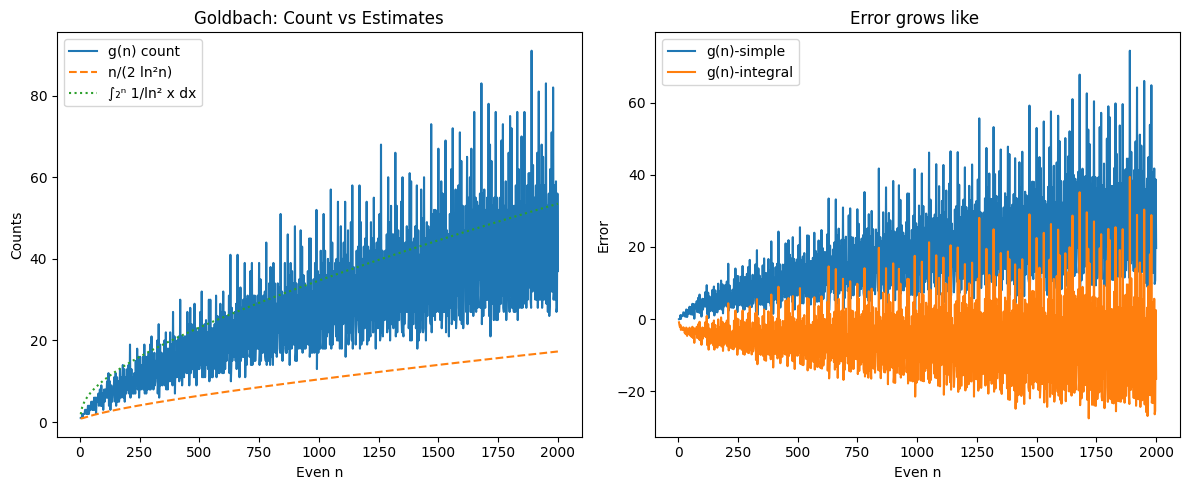

In [ ]:
def gen_primes(n):
    return list(sp.primerange(2, n+1))

def goldbach_count(n, primes_set, primes_list):
    count = 0
    for p in primes_list:
        if p > n//2: break
        if (n - p) in primes_set:
            count += 1
    return count

def integral_estimate(n):
    # approximate ∫₂ⁿ 1/(ln x)² dx
    def f(x):
        return 1.0/(np.log(x)**2)
    I, _ = quad(f, 2, n)
    return n/(2*(np.log(n)**2)), I  

n_max = 2000
primes = gen_primes(n_max)
p_set = set(primes)

evens = np.arange(4, n_max+1, 2)
g = np.array([goldbach_count(n, p_set, primes) for n in evens])

est_simple = np.array([integral_estimate(n)[0] for n in evens])
est_int = np.array([integral_estimate(n)[1] for n in evens])
error_simple = g - est_simple
error_int = g - est_int

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.plot(evens, g, label='g(n) count')
plt.plot(evens, est_simple, '--', label='n/(2 ln²n)')
plt.plot(evens, est_int, ':', label='∫₂ⁿ 1/ln² x dx')
plt.xlabel('Even n'); plt.ylabel('Counts')
plt.legend()
plt.title('Goldbach: Count vs Estimates')

plt.subplot(1,2,2)
plt.plot(evens, error_simple, label='g(n)-simple')
plt.plot(evens, error_int, label='g(n)-integral')
plt.xlabel('Even n'); plt.ylabel('Error')
plt.legend()
plt.title('Error grows like ')

plt.tight_layout()
plt.show()

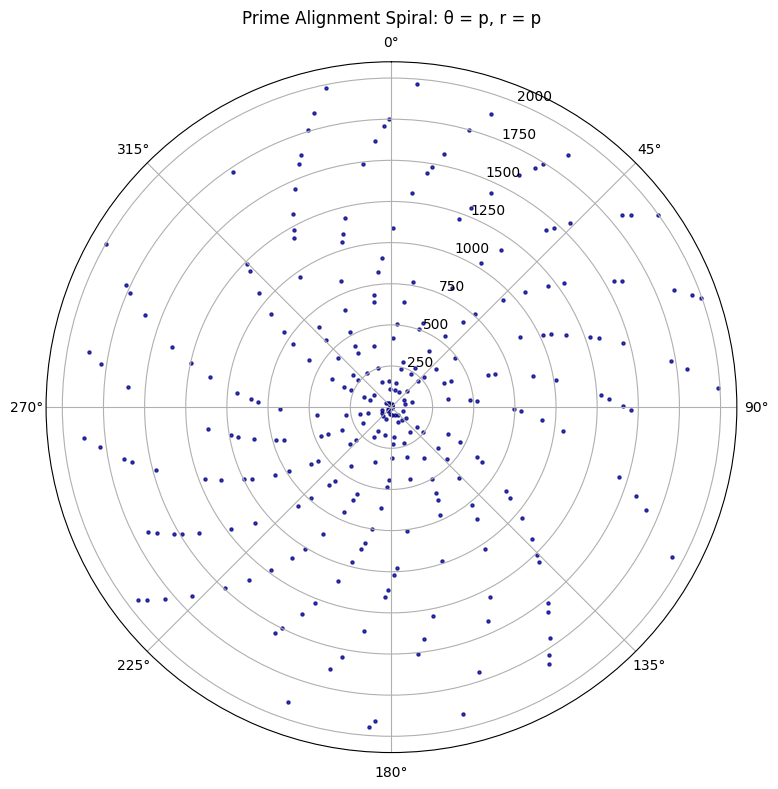

In [12]:
N = 2000
primes = list(sp.primerange(2, N))

theta = np.array(primes)
r = np.array(primes)

plt.figure(figsize=(8,8))
ax = plt.subplot(111, projection='polar')
ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.scatter(theta, r, s=5, color='darkblue', alpha=0.75)

ax.set_title("Prime Alignment Spiral: θ = p, r = p", va='bottom')
plt.tight_layout()
plt.show()
